# CNN an Introduction


![](https://miro.medium.com/max/2400/1*oB3S5yHHhvougJkPXuc8og.gif)


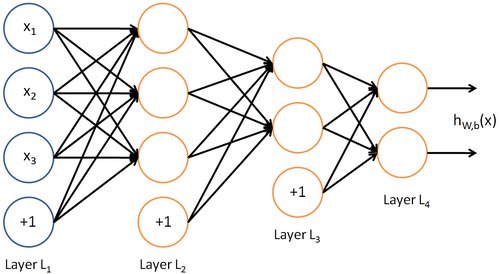



## Biology

**Neurons**

- Signals can be received from dendrites, and sent down the axon once enough signals were received. 
- This outgoing signal can then be used as another input for other neurons, repeating the process. 
- Some signals are more important than others and can trigger some neurons to fire easier.
- Connections can become stronger or weaker, new connections can appear while others can cease to exist.

![](http://krisbolton.com/assets/images/posts/2018/neuron-annotated.jpg)


**Perceptrons**

![](https://miro.medium.com/max/651/1*UA30b0mJUPYoPvN8yJr2iQ.jpeg)


Importance of Bias: The main function of Bias is to provide every node with a trainable constant value (in addition to the normal inputs that the node receives)


**Activation function**

Activation functions for perceptrons (step function, that would either output 0 or 1 if the sum of weights was larger than the threshold) and for the first artificial neurons (sigmoid function, that always outputs values between 0 and 1).

![](https://www.kdnuggets.com/wp-content/uploads/activation.png)




In [ ]:
# https://ujjwalkarn.me/2016/08/09/quick-intro-neural-networks/

# https://medium.com/@societyofai/introduction-to-neural-networks-and-deep-learning-6da681f14e6


# MNIST handwritten digit database

Images are 28x28 = 784 bytes flatten


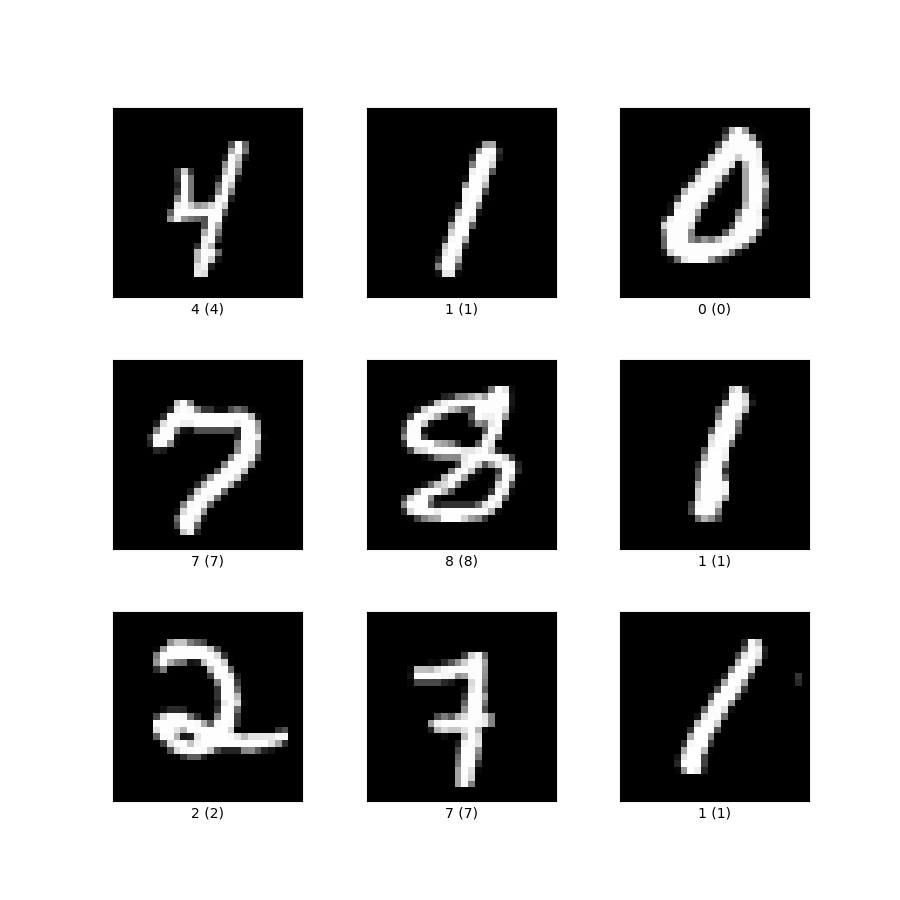



### Example: Basic classification MNIST

https://www.tensorflow.org/tutorials/keras/classification

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

In [2]:
mnist = tf.keras.datasets.mnist

**Training Dataset**: The sample of data used to fit the model.

**Test Dataset**: The sample of data used to provide an unbiased evaluation of a final model fit on the training dataset.|

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

![](https://developers.google.com/machine-learning/crash-course/images/PartitionTwoSets.svg)

In [4]:
# length of the datasets
print(f"len train = {len(train_images)}; len test = {len(test_images)}; "
      f"(Test set = {len(test_images)/len(train_images)*100:.2f}%)")


len train = 60000; len test = 10000; (Test set = 16.67%)


In [5]:
# Images shape
train_images[0].shape

(28, 28)

In [6]:
train_labels.shape

(60000,)

In [7]:
%matplotlib widget

# set up plot
fig, ax = plt.subplots(figsize=(6, 4))
ax.grid(False)


def plot_image(i):
    ax.imshow(train_images[i])
    ax.set_xlabel(f"Value: {train_labels[i]}", fontsize=12)


@widgets.interact(pos=(0, 20, 1))
def update(pos=0):
    plot_image(pos)
    fig.canvas.draw_idle()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

interactive(children=(IntSlider(value=0, description='pos', max=20), Output()), _dom_classes=('widget-interact…

In [8]:
class_names = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']

In [9]:
# Normalize the data
# Data from 0 to 1 instead of 0 to 255
train_images = train_images / 255.0

test_images = test_images / 255.0

In [10]:
# Labels are ints
train_labels[0]

5

In [11]:
# convert class vectors to binary class matrices
train_labels_binary = tf.keras.utils.to_categorical(train_labels, len(class_names))
test_labels_binary = tf.keras.utils.to_categorical(test_labels, len(class_names))

In [12]:
train_labels_binary[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

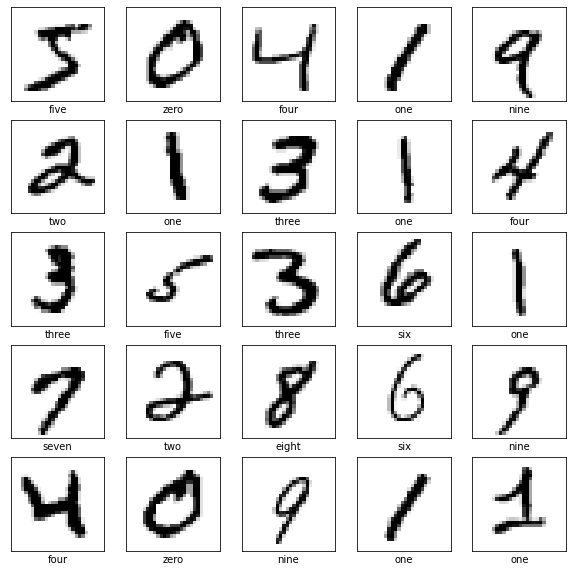

In [13]:
%matplotlib inline

# Let's plot the 25 first digits
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Model

![](https://achintavarna.files.wordpress.com/2017/11/mnist_2layers.png?w=634)


```python
# None because of the batch size. We don't know yet its size!
X = tf.placeholder(tf.float32, [None, 784])

# 1 hidden layer with 128 neurons
K = 128

# Weights initialised with small random values between -0.2 and +0.2
# When using RELUs, make sure biases are initialised with small *positive* values for example 0.1 = tf.ones([K])/10
W1 = tf.Variable(tf.truncated_normal([784, K], stddev=0.1))  # 784 = 28 * 28
B1 = tf.Variable(tf.zeros([K]))

W2 = tf.Variable(tf.truncated_normal([K, 10], stddev=0.1))
B2 = tf.Variable(tf.zeros([10]))

# The model
X = tf.reshape(X, [-1, 784])
Y1 = tf.nn.relu(tf.matmul(X, W1) + B1)
Y = tf.nn.linear(tf.matmul(Y1, W2) + B2)
```

### Softmax
![image.png](https://qph.fs.quoracdn.net/main-qimg-fda2f008df90ed5d7b6aff89b881e1ac.webp)

In [14]:
# Sequential groups a linear stack of layers
model = tf.keras.Sequential([
    # Flatten 28*28 = 784
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


## Compile - Configures the model for training

* Loss function
    - This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
<img src="https://miro.medium.com/max/725/1*lUUmNbjMNS1rfX4El9i5VA.png" style="width: 400px;"/>
* Optimizer
    - This is how the model is updated based on the data it sees and its loss function.
<img src="https://miro.medium.com/max/2400/1*hT12fHjYZJPXCCxjCWvM3w.png" style="width: 600px;"/>
* Metrics
    - Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.



In [15]:
model.compile(
    # https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
    optimizer='adam',
    # https://www.tensorflow.org/api_docs/python/tf/keras/losses
    loss=tf.keras.losses.CategoricalCrossentropy(),
    # https://www.tensorflow.org/api_docs/python/tf/keras/metrics
    metrics=['accuracy'] # Calculates how often predictions equal labels.
)

## Fit: Trains the model for a fixed number of epochs (iterations on a dataset)

In [16]:
batch_size = 100
epochs = 10

history = model.fit(
    train_images, train_labels_binary, batch_size=batch_size, epochs=epochs)

Epoch 1/10
600/600 [==============================] - 6s 9ms/step - loss: 0.5713 - accuracy: 0.8428
Epoch 2/10
600/600 [==============================] - 5s 8ms/step - loss: 0.1600 - accuracy: 0.9556
Epoch 3/10
600/600 [==============================] - 5s 8ms/step - loss: 0.1092 - accuracy: 0.9689
Epoch 4/10
600/600 [==============================] - 5s 8ms/step - loss: 0.0801 - accuracy: 0.9776
Epoch 5/10
600/600 [==============================] - 5s 8ms/step - loss: 0.0654 - accuracy: 0.9813
Epoch 6/10
600/600 [==============================] - 5s 8ms/step - loss: 0.0542 - accuracy: 0.9845
Epoch 7/10
600/600 [==============================] - 5s 8ms/step - loss: 0.0420 - accuracy: 0.9882
Epoch 8/10
600/600 [==============================] - 5s 8ms/step - loss: 0.0351 - accuracy: 0.9904
Epoch 9/10
600/600 [==============================] - 5s 8ms/step - loss: 0.0294 - accuracy: 0.9919
Epoch 10/10
600/600 [==============================] - 4s 7ms/step - loss: 0.0242 - accuracy: 0.9940

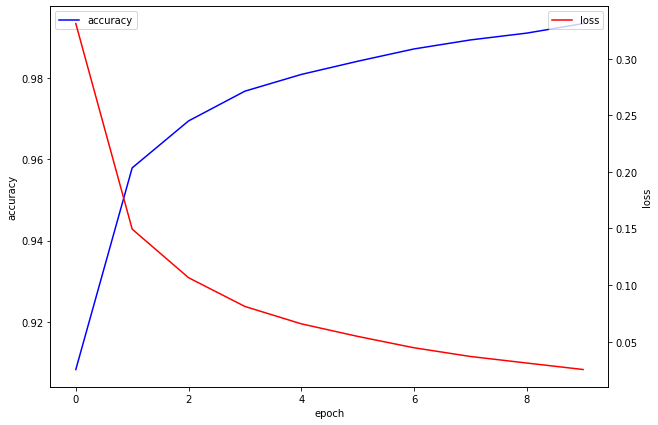

In [17]:
%matplotlib inline

# Let's plot the training over time / epochs
fig, ax1 = plt.subplots(figsize=(10, 7))

ax1.set_xlabel('epoch')
ax1.set_ylabel('accuracy')
ax1.plot(history.epoch, history.history['accuracy'], 'b-', label='accuracy')

ax2 = ax1.twinx()

ax2.set_ylabel('loss')
ax2.plot(history.epoch, history.history['loss'], 'r-',  label='loss')

ax1.legend()
ax2.legend()

In [18]:
# Evaluate accuracy with the test set

test_loss, test_acc = model.evaluate(test_images,  test_labels_binary, verbose=2)


313/313 - 4s - loss: 0.0693 - accuracy: 0.9787


# Predictions



In [19]:
predictions = model.predict(test_images)
predictions

array([[5.23610140e-07, 3.96411792e-09, 1.75556997e-05, ...,
        9.98429179e-01, 2.53516118e-05, 8.41707424e-06],
       [2.43368520e-10, 2.73665160e-06, 9.99965429e-01, ...,
        1.20871377e-16, 3.05620088e-05, 4.65637240e-13],
       [2.36285729e-07, 9.98911262e-01, 1.41633020e-04, ...,
        5.25836251e-04, 3.74786294e-04, 6.24985262e-07],
       ...,
       [5.92255628e-12, 3.70170006e-10, 8.08094043e-12, ...,
        1.05435793e-05, 4.04496404e-06, 1.27613771e-06],
       [2.13602903e-11, 1.83770794e-12, 9.18332944e-12, ...,
        7.29689920e-12, 2.68527901e-06, 1.10837629e-13],
       [2.96698222e-10, 8.88855558e-13, 1.81813693e-08, ...,
        4.46973399e-15, 6.91604551e-10, 1.11147185e-11]], dtype=float32)

In [20]:
from tabulate import tabulate

max_index = 12

l = [np.append(p, l) for p, l in zip(predictions[0:max_index], test_labels[0:max_index])]

print(tabulate(
    l,
    headers=class_names + ["value"],
    showindex=True,
    floatfmt=".4f"
))

      zero     one     two    three    four    five     six    seven    eight    nine    value
--  ------  ------  ------  -------  ------  ------  ------  -------  -------  ------  -------
 0  0.0000  0.0000  0.0000   0.0015  0.0000  0.0000  0.0000   0.9984   0.0000  0.0000   7.0000
 1  0.0000  0.0000  1.0000   0.0000  0.0000  0.0000  0.0000   0.0000   0.0000  0.0000   2.0000
 2  0.0000  0.9989  0.0001   0.0000  0.0000  0.0000  0.0000   0.0005   0.0004  0.0000   1.0000
 3  1.0000  0.0000  0.0000   0.0000  0.0000  0.0000  0.0000   0.0000   0.0000  0.0000   0.0000
 4  0.0000  0.0000  0.0000   0.0000  0.9740  0.0000  0.0000   0.0001   0.0000  0.0259   4.0000
 5  0.0000  0.9987  0.0000   0.0000  0.0000  0.0000  0.0000   0.0013   0.0000  0.0000   1.0000
 6  0.0000  0.0000  0.0000   0.0000  0.9992  0.0000  0.0000   0.0000   0.0002  0.0007   4.0000
 7  0.0000  0.0000  0.0000   0.0001  0.0019  0.0000  0.0000   0.0000   0.0000  0.9980   9.0000
 8  0.0000  0.0000  0.0000   0.0000  0.0001  0.984

In [21]:
%matplotlib widget


# set up plot
fig, ax = plt.subplots(figsize=(6, 4))
ax.grid(False)


def plot_image(i):
    ax.imshow(test_images[i])
    ax.set_xlabel(f"Value: {test_labels[i]}", fontsize=12)


@widgets.interact(pos=(0, 11, 1))
def update(pos=0):
    plot_image(pos)
    fig.canvas.draw_idle()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

interactive(children=(IntSlider(value=0, description='pos', max=11), Output()), _dom_classes=('widget-interact…

In [22]:
# Verify predictions

def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

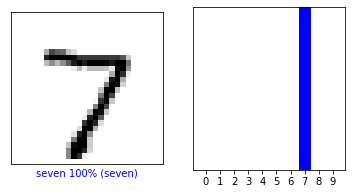

In [23]:
%matplotlib inline

i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

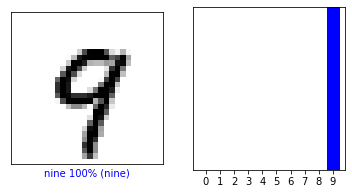

In [24]:
%matplotlib inline

i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

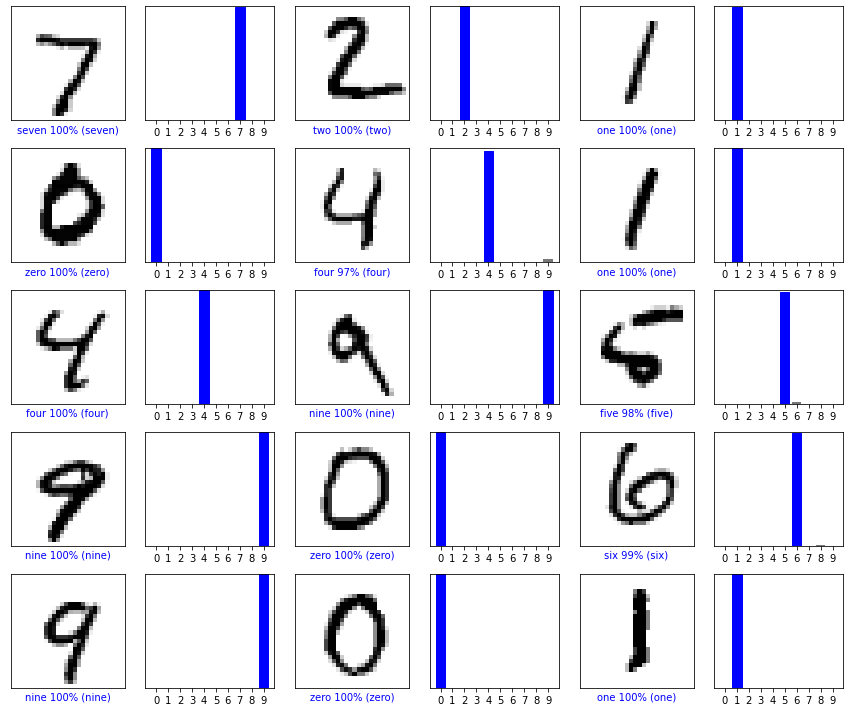

In [25]:
%matplotlib inline

# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()